In [1]:
%matplotlib ipympl 
# python notebook to display blob functionality

import numpy as np
from machinevisiontoolbox import Image
import matplotlib.pyplot as plt

# hope to remove these imports eventually
import matplotlib.pyplot as plt # note: shouldn't have to use these soon
# import cv2 as cv  # note: shouldn't have to do these soon

from machinevisiontoolbox import Image

# read in image
im = Image.Read('multiblobs.png', mono=True)

# call Blobs class
b = im.blobs()

# show blobs
ax = im.disp()

b.plot_box()

ModuleNotFoundError: No module named 'ipympl'

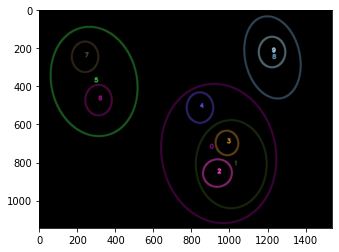

[[[910 387]]

 [[909 388]]

 [[908 388]]

 ...

 [[913 387]]

 [[912 387]]

 [[911 387]]]
(1899, 1, 2)
[910 387]
(1144, 1541)
0


In [2]:

# show blobs as contours:
imcont = b.drawBlobs(im, None,None,None,contourthickness=10, textthickness=5)

imcont.disp()
# plt.imshow(imcont)
# plt.show()

ic = 0
ipix = 0
print(b._contours[ic])
print(b._contours[ic].shape)

# pixel coordinates of interest that are 'part' of the contour from findContours
print(b._contours[ic][ipix][0][0:])  

# value of the image at this pixel coordinate:
print(im.shape)

# if 0, then part of the black background, if 1, then actually part of the blob itself
print(im.image[b._contours[ic][ipix][0][0], b._contours[ic][ipix][0][1]])

# 0, so findContours returns the outside border of blob
# this means that the perimeter will be slightly larger than the true blob's perimeter


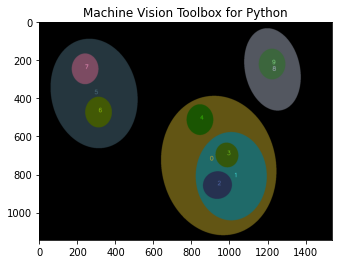

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Machine Vision Toolbox for Python'}>)

In [3]:

# issue: this creates a new window and so the image is not saved inline with the python notebook. 
# additionally, pressing the "X" or close window button crashes the entire python kernel...

# in opencv code:
#cv.imshow('blobby', imblobs) 
#cv.waitKey(0)
#cv.destroyAllWindows()

# using mvt:
mvt.idisp(imblobs)

# potential solution: create an "inline" option for idisp, so that we use matplotlib's imshow instead of opencv's imshow?


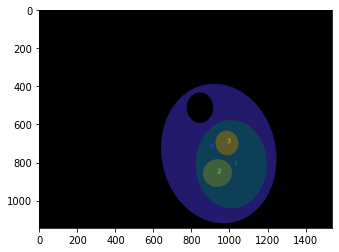

In [4]:
# plot specific contours via specifying the index of the contours, icont

imcont0 = b.drawBlobs(im, None, icont=np.arange(0,4))
# plt.imshow(imcont0)
# plt.show()
imcont0.disp()

In [5]:
# display area:

print('Blob area')
print(b.area)

print('Blob centroid')
print(b.centroid)




Blob area
[164748.5 105984.   17235.5  12100.   17516.  169904.   17512.5  17524.
  81418.5  17521. ]
Blob centroid
(array([ 898.84604109, 1025.00042459,  938.12879425,  988.07628099,
        846.04635762,  291.73903695,  312.6708827 ,  241.90056494,
       1227.99011691, 1225.20024542]), array([725.32732114, 813.72211843, 855.17236711, 697.2338843 ,
       511.72750628, 377.76350959, 472.14031882, 245.04887583,
       254.28548999, 220.03464414]))


In [6]:

print('number of blobs')
print(len(b))

print('slice of blobs')

b2 = b[0:2]
print('area =', b2.area)

number of blobs
10
slice of blobs
area = [164748.5 105984. ]


Edge case for blobs


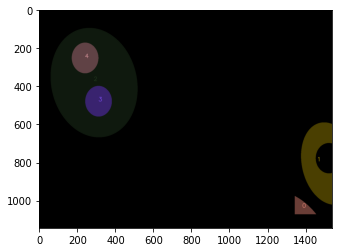

number of blobs =  5
blob area =  [  6113.5  43914.5 187428.   17512.5  17524. ]
blob parent =  [-1 -1  3 -1 -1]


In [7]:

print('Edge case for blobs')

im2 = Image('../images/multiblobs_edgecase.png')
b2 = mvt.Blob(image=im2)
d2 = b2.drawBlobs(im2, contourthickness=-1)

d2.disp()
# plt.imshow(d2)
# plt.show()

print('number of blobs = ', len(b2))
print('blob area = ', b2.area)
print('blob parent = ', b2._parent)